In [1]:
outlier <- function(x, p = 0.99, G = 1:9) {
    # Mclust混合分布モデルによる分布推定
    library(mclust, quietly = TRUE)
    fit <- Mclust(x, G = G, model = "V")
    means <- fit$parameters$mean
    sigmasqs   <- fit$parameters$variance$sigmasq
    names(means) <- NULL

    # 推定結果のうち、最大の物と最小の物の分布でホテリング法を用いて99%閾値を求める
    index_max <- which.max(means)
    index_min <- which.min(means)
    mu <- means[index_max]
    s2 <- sigmasqs[index_max]
    thr <- qchisq(p, 1) # カイ二乗分布から99%閾値を求める
    thr_high <- (2 * mu + sqrt((mu * -2)^2 - 4 * (mu^2 - thr * s2))) / 2
    mu <- means[index_min]
    s2 <- sigmasqs[index_min]
    thr_low <- (2 * mu - sqrt((mu * -2)^2 - 4 * (mu^2 - thr * s2))) / 2
    return(list(fit = fit, thr_high = thr_high, thr_low = thr_low))
}

In [2]:
# データのロード
unzip("data-independent.zip")
df <- read.csv("data-independent.csv")
file.remove("data-independent.csv")
y_gmm <- df[["y_gmm"]]

[1] TRUE

Package 'mclust' version 5.4.7
Type 'citation("mclust")' for citing this R package in publications.



[1] 326.98232 -15.38023


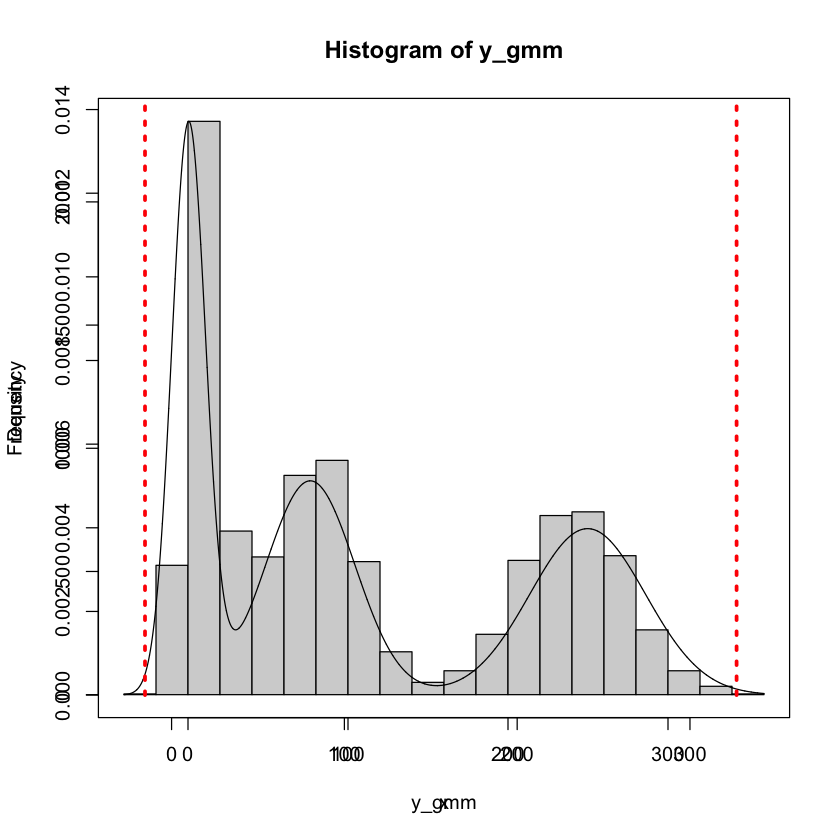

In [3]:
ret <- outlier(y_gmm)
fit <- ret$fit
thr_high <- ret$thr_high
thr_low <- ret$thr_low
print(c(thr_high, thr_low))
hist(y_gmm)
par(new = T)
plot(fit, what = "density")
segments(thr_high, 0, thr_high, 300, col = "red", lty = 3, lwd = 3) # 閾値に線を引く
segments(thr_low, 0, thr_low, 300, col = "red", lty = 3, lwd = 3) # 閾値に線を引く

In [4]:
y <- rnorm(4000, mean = 10, sd = 5)
y <- c(y, rnorm(3000, mean = 30, sd = 5))
y <- c(y, rnorm(2000, mean = 50, sd = 5))

[1] 62.886185 -3.295853


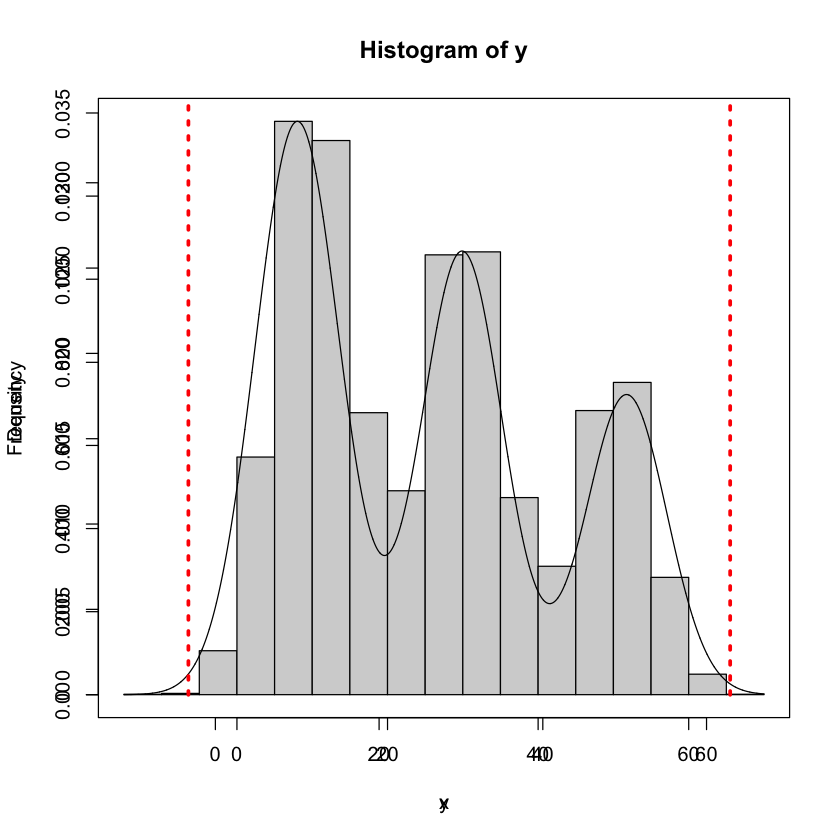

In [5]:
ret <- outlier(y)
fit <- ret$fit
thr_high <- ret$thr_high
thr_low <- ret$thr_low
print(c(thr_high, thr_low))
hist(y)
par(new = T)
plot(fit, what = "density")
segments(thr_high, 0, thr_high, 300, col = "red", lty = 3, lwd = 3) # 閾値に線を引く
segments(thr_low, 0, thr_low, 300, col = "red", lty = 3, lwd = 3) # 閾値に線を引く

In [6]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


[1] 2
[1] 7.025334 1.019578


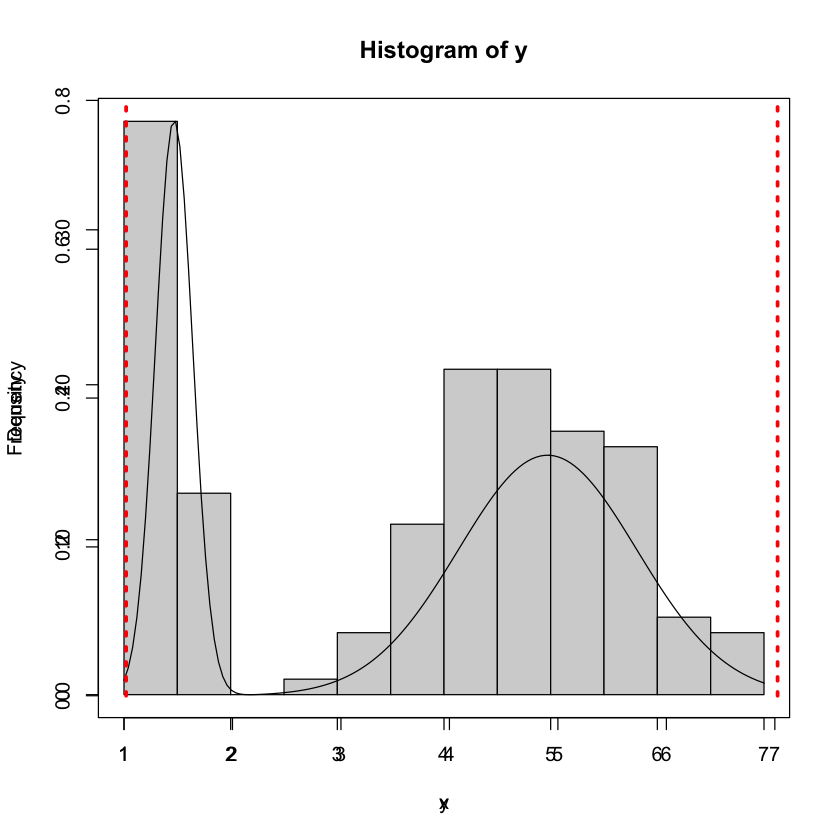

In [7]:
y <- iris$Petal.Length
ret <- outlier(y)
fit <- ret$fit
print(fit$G)
thr_high <- ret$thr_high
thr_low <- ret$thr_low
print(c(thr_high, thr_low))
hist(y)
par(new = T)
plot(fit, what = "density")
segments(thr_high, 0, thr_high, 300, col = "red", lty = 3, lwd = 3) # 閾値に線を引く
segments(thr_low, 0, thr_low, 300, col = "red", lty = 3, lwd = 3) # 閾値に線を引く

# ポアソン分布

ポアソン分布にGMを掛けると時間がかかる？  
1061秒かかった

[1] 1
[1]  3.66396 -1.62396


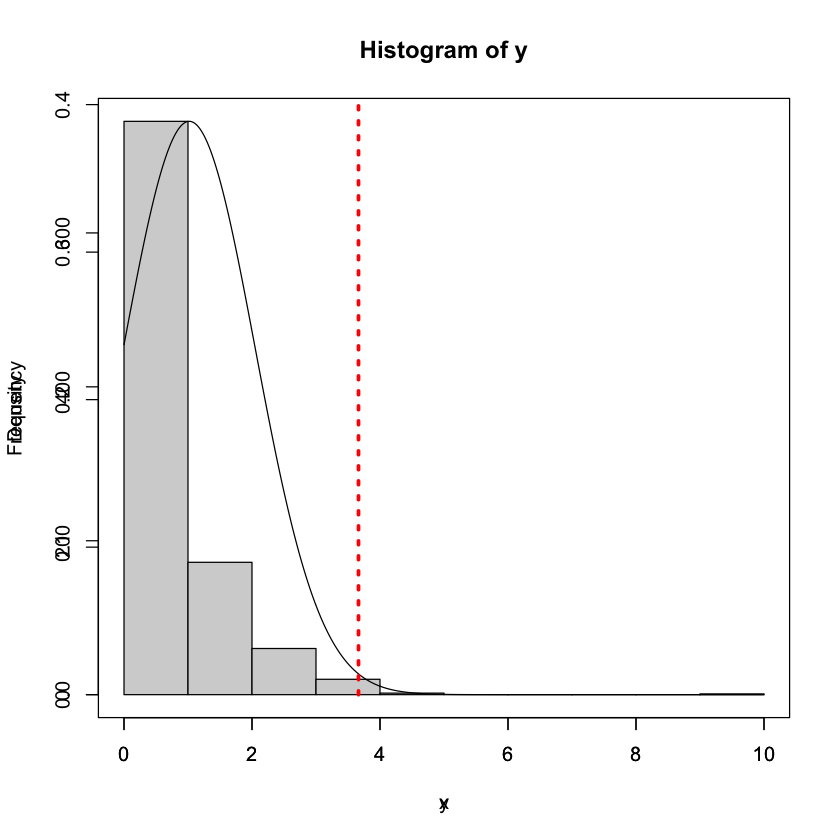

In [8]:
y <- rpois(1000, lambda = 1)
y[1000] <- 10

ret <- outlier(y)
fit <- ret$fit
print(fit$G)
thr_high <- ret$thr_high
thr_low <- ret$thr_low
print(c(thr_high, thr_low))
hist(y)
par(new = T)
plot(fit, what = "density")
segments(thr_high, 0, thr_high, 300, col = "red", lty = 3, lwd = 3) # 閾値に線を引く
segments(thr_low, 0, thr_low, 300, col = "red", lty = 3, lwd = 3) # 閾値に線を引く

[1] 2
[1]  8.9721700 -0.8843836


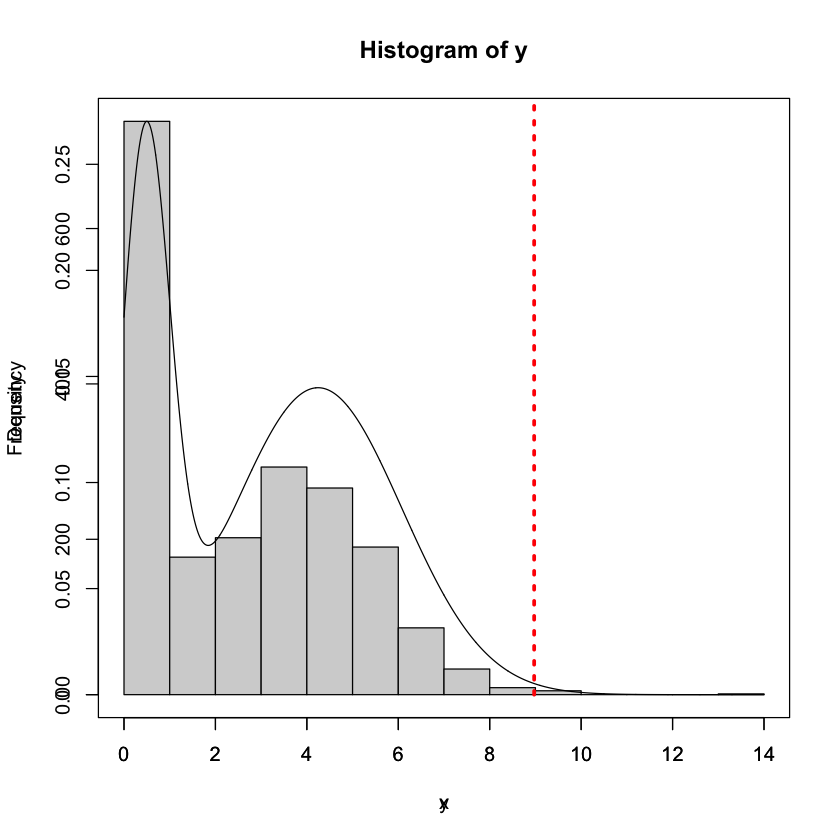

In [9]:
y <- rpois(1000, lambda = 1)
y <- c(y, rpois(1000, lambda = 2) + 3)
y[1000] <- 14

ret <- outlier(y)
fit <- ret$fit
print(fit$G)
thr_high <- ret$thr_high
thr_low <- ret$thr_low
print(c(thr_high, thr_low))
hist(y)
par(new = T)
plot(fit, what = "density")
segments(thr_high, 0, thr_high, 300, col = "red", lty = 3, lwd = 3) # 閾値に線を引く
segments(thr_low, 0, thr_low, 300, col = "red", lty = 3, lwd = 3) # 閾値に線を引く

[1] 2
[1]  9.363799 -2.452893


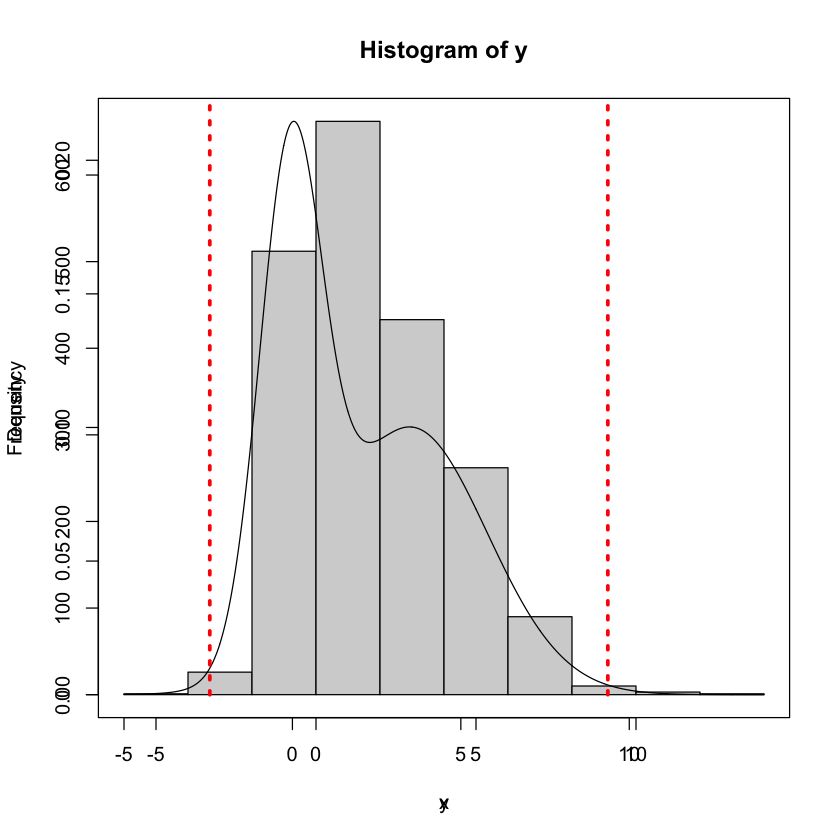

In [10]:
y <- rpois(1000, lambda = 1 + 3)
y <- c(y, rnorm(1000))
y[1000] <- 14
y[2000] <- -5

ret <- outlier(y)
fit <- ret$fit
print(fit$G)
thr_high <- ret$thr_high
thr_low <- ret$thr_low
print(c(thr_high, thr_low))
hist(y)
par(new = T)
plot(fit, what = "density")
segments(thr_high, 0, thr_high, 300, col = "red", lty = 3, lwd = 3) # 閾値に線を引く
segments(thr_low, 0, thr_low, 300, col = "red", lty = 3, lwd = 3) # 閾値に線を引く

In [27]:
y <- sample(10:100, 1000, replace = TRUE)
y[1000] <- 107
y[999] <- 1

ret <- outlier(y, G = 1:9)
fit <- ret$fit
print(fit$G)
thr_high <- ret$thr_high
thr_low <- ret$thr_low
print(c(thr_high, thr_low))
hist(y)
par(new = T)
plot(fit, what = "density")
segments(thr_high, 0, thr_high, 300, col = "red", lty = 3, lwd = 3) # 閾値に線を引く
segments(thr_low, 0, thr_low, 300, col = "red", lty = 3, lwd = 3) # 閾値に線を引く

ERROR: Error in runif(n):  オブジェクト 'n' がありません 


ERROR: Error in eval(expr, envir, enclos):  オブジェクト 'p' がありません 


[1] 1
[1] 18.019821  2.156179


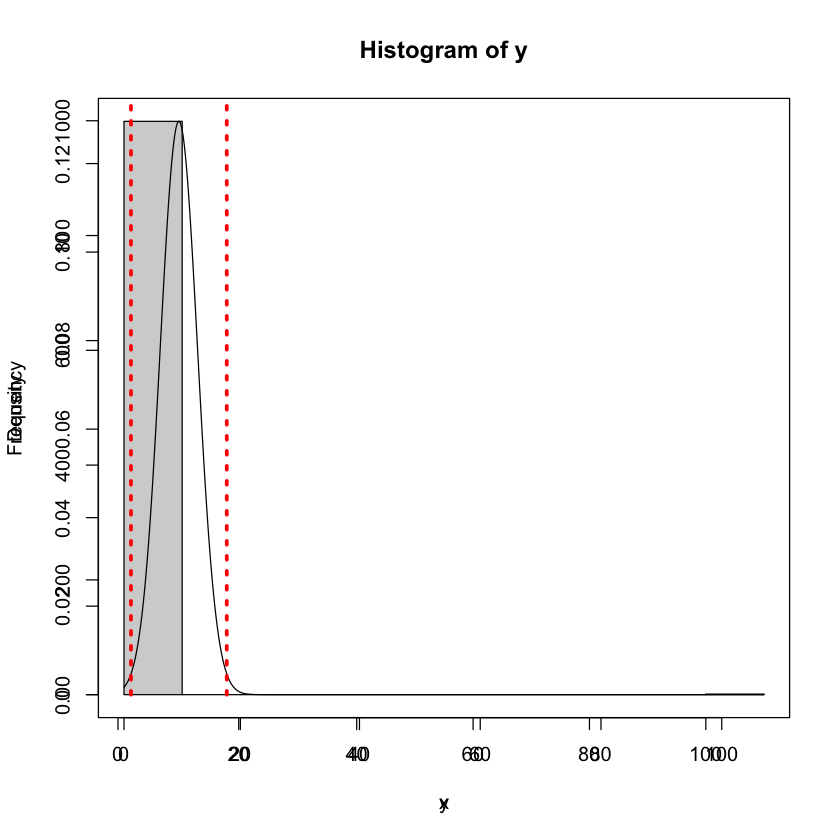

In [35]:
p <- dnorm(10:100, mean = 50, sd = 20)
y <- sample(10:100, 1000, replace = TRUE, prob = p)
y[1000] <- 107
y[999] <- 1

ret <- outlier(y)
fit <- ret$fit
print(fit$G)
thr_high <- ret$thr_high
thr_low <- ret$thr_low
print(c(thr_high, thr_low))
hist(y)
par(new = T)
plot(fit, what = "density")
segments(thr_high, 0, thr_high, 300, col = "red", lty = 3, lwd = 3) # 閾値に線を引く
segments(thr_low, 0, thr_low, 300, col = "red", lty = 3, lwd = 3) # 閾値に線を引く